<a href="https://colab.research.google.com/github/u-t-k-a-n/Detection-of-Similar-Points-in-Traffic-Characteristics/blob/main/NonWorkingHour2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import calendar
from google.colab import drive
drive.mount('/content/drive')
path = "drive/MyDrive/2017_concat/Concat_2017.csv"

Mounted at /content/drive


In [ ]:
df = pd.read_csv(path)
non_working_hour_index = set()

In [ ]:
for i in range(0,24*60//5):
  hour = int(df.loc[i]["time"][11:13])

  if not (9 <= hour <= 17):
    non_working_hour_index.add(i)

In [ ]:
all_index = list()
for i in range(1,366):
  for j in non_working_hour_index:
    all_index.append(i*j)
x = list()
for i in all_index:
  x.append(df.loc[i])
df2 = pd.DataFrame()
df2 = df2.append(x)
df_corr = df2.corr()
arr = df_corr.copy()
arr

,drive/MyDrive/2017_v1/739_1_2017.csv,drive/MyDrive/2017_v1/482_1_2017.csv,drive/MyDrive/2017_v1/1920_1_2017.csv,drive/MyDrive/2017_v1/715_0_2017.csv,drive/MyDrive/2017_v1/1778_0_2017.csv,drive/MyDrive/2017_v1/722_1_2017.csv,drive/MyDrive/2017_v1/306_1_2017.csv,drive/MyDrive/2017_v1/1832_1_2017.csv,drive/MyDrive/2017_v1/1923_1_2017.csv,drive/MyDrive/2017_v1/603_1_2017.csv,drive/MyDrive/2017_v1/1868_1_2017.csv,drive/MyDrive/2017_v1/588_1_2017.csv,drive/MyDrive/2017_v1/485_1_2017.csv,drive/MyDrive/2017_v1/743_1_2017.csv,drive/MyDrive/2017_v1/380_1_2017.csv,drive/MyDrive/2017_v1/420_1_2017.csv,drive/MyDrive/2017_v1/1431_0_2017.csv,drive/MyDrive/2017_v1/931_0_2017.csv,drive/MyDrive/2017_v1/256_0_2017.csv,drive/MyDrive/2017_v1/1730_1_2017.csv,drive/MyDrive/2017_v1/452_0_2017.csv,drive/MyDrive/2017_v1/721_0_2017.csv,drive/MyDrive/2017_v1/1967_1_2017.csv,drive/MyDrive/2017_v1/187_1_2017.csv,drive/MyDrive/2017_v1/1746_0_2017.csv,drive/MyDrive/2017_v1/30_0_2017.csv,drive/MyDrive/2017_v1/70_1_2017.csv,drive/MyDrive/2017_v1/102_0_2017.csv,drive/MyDrive/2017_v1/601_0_2017.csv,drive/MyDrive/2017_v1/337_0_2017.csv,drive/MyDrive/2017_v1/694_0_2017.csv,drive/MyDrive/2017_v1/181_0_2017.csv,drive/MyDrive/2017_v1/641_0_2017.csv,drive/MyDrive/2017_v1/644_1_2017.csv,drive/MyDrive/2017_v1/203_0_2017.csv,drive/MyDrive/2017_v1/509_0_2017.csv,drive/MyDrive/2017_v1/326_0_2017.csv,drive/MyDrive/2017_v1/497_0_2017.csv,drive/MyDrive/2017_v1/880_0_2017.csv,drive/MyDrive/2017_v1/821_1_2017.csv,...,drive/MyDrive/2017_v1/726_1_2017.csv,drive/MyDrive/2017_v1/251_1_2017.csv,drive/MyDrive/2017_v1/83_0_2017.csv,drive/MyDrive/2017_v1/514_0_2017.csv,drive/MyDrive/2017_v1/1836_0_2017.csv,drive/MyDrive/2017_v1/504_1_2017.csv,drive/MyDrive/2017_v1/1438_1_2017.csv,drive/MyDrive/2017_v1/599_0_2017.csv,drive/MyDrive/2017_v1/1858_1_2017.csv,drive/MyDrive/2017_v1/638_1_2017.csv,drive/MyDrive/2017_v1/21_0_2017.csv,drive/MyDrive/2017_v1/480_1_2017.csv,drive/MyDrive/2017_v1/891_1_2017.csv,drive/MyDrive/2017_v1/399_1_2017.csv,drive/MyDrive/2017_v1/589_0_2017.csv,drive/MyDrive/2017_v1/1831_1_2017.csv,drive/MyDrive/2017_v1/750_0_2017.csv,drive/MyDrive/2017_v1/1440_1_2017.csv,drive/MyDrive/2017_v1/884_1_2017.csv,drive/MyDrive/2017_v1/387_1_2017.csv,drive/MyDrive/2017_v1/613_0_2017.csv,drive/MyDrive/2017_v1/529_0_2017.csv,drive/MyDrive/2017_v1/17_1_2017.csv,drive/MyDrive/2017_v1/453_1_2017.csv,drive/MyDrive/2017_v1/392_1_2017.csv,drive/MyDrive/2017_v1/740_0_2017.csv,drive/MyDrive/2017_v1/706_1_2017.csv,drive/MyDrive/2017_v1/881_1_2017.csv,drive/MyDrive/2017_v1/308_0_2017.csv,drive/MyDrive/2017_v1/279_0_2017.csv,drive/MyDrive/2017_v1/1837_0_2017.csv,drive/MyDrive/2017_v1/1853_0_2017.csv,drive/MyDrive/2017_v1/202_0_2017.csv,drive/MyDrive/2017_v1/1891_0_2017.csv,drive/MyDrive/2017_v1/619_1_2017.csv,drive/MyDrive/2017_v1/189_0_2017.csv,drive/MyDrive/2017_v1/1751_0_2017.csv,drive/MyDrive/2017_v1/641_1_2017.csv,drive/MyDrive/2017_v1/542_1_2017.csv,drive/MyDrive/2017_v1/714_1_2017.csv
drive/MyDrive/2017_v1/739_1_2017.csv,1.000000,0.410228,0.167496,0.334520,0.545339,0.196164,0.055748,0.301653,0.173353,0.367994,0.255735,0.450617,0.548199,0.191798,0.411685,0.752105,0.217519,0.114406,0.192631,0.551143,0.470507,0.259354,0.043815,0.511702,0.376906,0.241740,0.658033,0.517295,0.521569,0.541288,0.061803,0.072380,0.179728,0.323704,0.386120,-0.041480,0.505789,0.370396,0.307690,-0.218676,...,0.288621,0.184161,0.363375,0.280755,0.289946,0.682075,0.192251,-0.285369,0.337732,0.431777,0.320676,0.417802,0.086767,0.249049,0.133119,0.021294,0.364878,0.219667,-0.001350,0.189551,0.554208,0.327222,-0.023798,0.621497,0.110565,0.623652,0.265702,0.037516,0.646605,0.174305,0.288666,0.139067,0.365675,0.314524,0.574403,0.583718,0.213847,0.195589,0.179235,0.145355
drive/MyDrive/2017_v1/482_1_2017.csv,0.410228,1.000000,0.383224,0.516561,0.597559,0.446340,0.249215,0.525862,0.386910,0.670977,0.510834,0.362985,0.761290,0.288477,0.614441,0.351523,0.401968,0.325001,0.461241,0.341219,0.638918,0.450995,0.122699,0.729723,0.3

In [ ]:
cols = list(arr.columns)
corr = np.array(arr)
corr

array([[1.        , 0.41022812, 0.16749567, ..., 0.19558901, 0.17923476,
        0.14535505],
       [0.41022812, 1.        , 0.38322411, ..., 0.32994855, 0.19400225,
        0.33245223],
       [0.16749567, 0.38322411, 1.        , ..., 0.50492655, 0.19807374,
        0.50654515],
       ...,
       [0.19558901, 0.32994855, 0.50492655, ..., 1.        , 0.18010313,
        0.4411382 ],
       [0.17923476, 0.19400225, 0.19807374, ..., 0.18010313, 1.        ,
        0.18681647],
       [0.14535505, 0.33245223, 0.50654515, ..., 0.4411382 , 0.18681647,
        1.        ]])

In [ ]:
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram
from scipy.spatial.distance import squareform
corr = (corr + corr.T)/2  # making symmetric
np.fill_diagonal(corr, 1) # making diagonal 1
dissimilarity = 1 - np.abs(corr)

In [ ]:
from collections import defaultdict

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='single')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

4

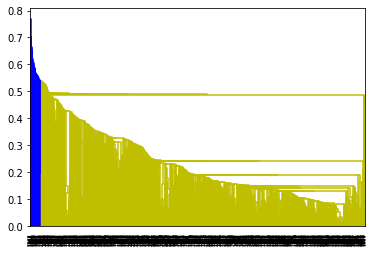

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1463
cluster:4 len:1
cluster:3 len:1
cluster:2 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='complete')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

74

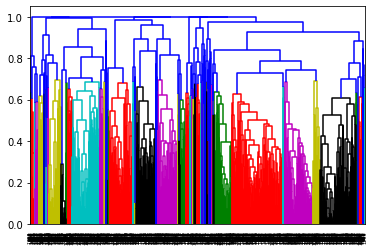

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:33 len:88
cluster:62 len:223
cluster:12 len:54
cluster:61 len:80
cluster:43 len:18
cluster:66 len:155
cluster:23 len:99
cluster:54 len:1
cluster:11 len:5
cluster:64 len:125
cluster:27 len:84
cluster:2 len:16
cluster:16 len:121
cluster:58 len:10
cluster:65 len:32
cluster:51 len:10
cluster:14 len:9
cluster:13 len:21
cluster:26 len:6
cluster:37 len:18
cluster:38 len:8
cluster:5 len:22
cluster:24 len:9
cluster:68 len:18
cluster:22 len:13
cluster:41 len:4
cluster:19 len:2
cluster:45 len:8
cluster:36 len:27
cluster:39 len:5
cluster:6 len:3
cluster:53 len:7
cluster:72 len:6
cluster:70 len:1
cluster:17 len:20
cluster:63 len:7
cluster:7 len:5
cluster:9 len:2
cluster:67 len:11
cluster:40 len:6
cluster:42 len:8
cluster:15 len:19
cluster:73 len:1
cluster:57 len:2
cluster:4 len:14
cluster:47 len:2
cluster:59 len:2
cluster:34 len:6
cluster:30 len:2
cluster:18 len:7
cluster:35 len:3
cluster:3 len:2
cluster:69 len:1
cluster:1 len:5
cluster:60 len:2
cluster:10 len:6
cluster:52 len:2
cluster:71 

In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/NonWorkingHourCompleteClusterCoord_2017.csv")

In [ ]:
import plotly.express as px
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/NonWorkingHourCompleteClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='weighted')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

37

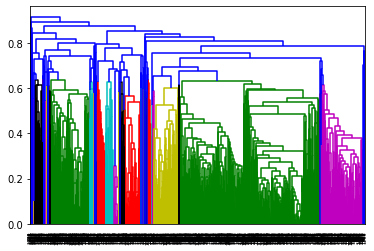

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:29 len:732
cluster:30 len:189
cluster:22 len:91
cluster:10 len:183
cluster:11 len:1
cluster:4 len:44
cluster:21 len:61
cluster:13 len:18
cluster:20 len:38
cluster:27 len:28
cluster:2 len:3
cluster:24 len:8
cluster:8 len:14
cluster:26 len:4
cluster:32 len:1
cluster:18 len:2
cluster:15 len:1
cluster:14 len:2
cluster:25 len:9
cluster:12 len:2
cluster:23 len:1
cluster:1 len:4
cluster:5 len:5
cluster:35 len:1
cluster:19 len:6
cluster:31 len:1
cluster:28 len:2
cluster:6 len:3
cluster:33 len:1
cluster:34 len:4
cluster:16 len:1
cluster:9 len:1
cluster:3 len:1
cluster:17 len:1
cluster:36 len:1
cluster:37 len:1
cluster:7 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/NonWorkingHourWeightedClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/NonWorkingHourWeightedClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='centroid')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

6

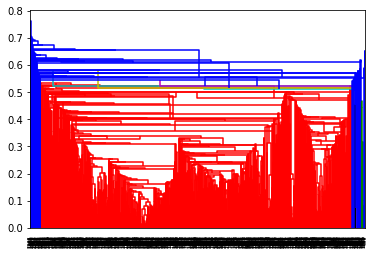

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:1 len:1461
cluster:3 len:1
cluster:2 len:1
cluster:6 len:1
cluster:5 len:1
cluster:4 len:1


In [ ]:
hierarchy = linkage(squareform(dissimilarity), method='average')
labels = fcluster(hierarchy, 0.7, criterion='distance')
labels.max()

30

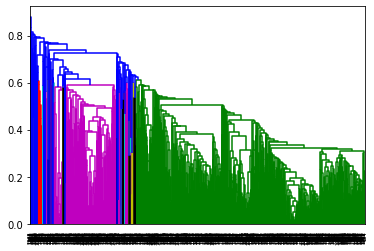

In [ ]:
den = dendrogram(hierarchy)

In [ ]:
clusters = defaultdict(list)
for i,val in enumerate(labels):
  clusters[val].append(cols[i])
for cluster in clusters:
  print("cluster:{} len:{}".format(cluster,len(clusters[cluster])))

cluster:25 len:1083
cluster:23 len:281
cluster:19 len:1
cluster:22 len:11
cluster:13 len:30
cluster:4 len:3
cluster:17 len:14
cluster:14 len:6
cluster:15 len:1
cluster:20 len:2
cluster:21 len:4
cluster:2 len:1
cluster:1 len:2
cluster:5 len:3
cluster:7 len:4
cluster:8 len:3
cluster:26 len:1
cluster:6 len:1
cluster:24 len:4
cluster:16 len:1
cluster:3 len:1
cluster:18 len:1
cluster:30 len:1
cluster:9 len:1
cluster:29 len:1
cluster:11 len:1
cluster:28 len:1
cluster:10 len:1
cluster:12 len:1
cluster:27 len:1


In [ ]:
path = 'drive/MyDrive/Metadata/Coordinates_2017.csv'
df = pd.read_csv(path)
df["cluster"] = -1
for i in range(len(df)):
  file_name =  'drive/MyDrive/2017_v1/{}_{}_2017.csv'.format(int(df.loc[i]["vSegID"]),int(df.loc[i]["vSegDir"]))
  for cluster in clusters:
    if file_name in clusters[cluster]:
      df.iloc[i] = [int(df.loc[i]["vSegID"]), int(df.loc[i]["vSegDir"]),
                   df.loc[i]["longitude"], df.loc[i]["latitude"],
                   cluster]
      break

df.to_csv("drive/MyDrive/SimilarityScores/Coordinates/2017/NonWorkingHourAverageClusterCoord_2017.csv")

In [ ]:
path = "drive/MyDrive/SimilarityScores/Coordinates/2017/NonWorkingHourAverageClusterCoord_2017.csv"
df = pd.read_csv(path)
df = df.drop("Unnamed: 0",axis=1)
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter_mapbox(df, lon='latitude', lat='longitude', hover_name='vSegID', hover_data=['vSegDir',"cluster"],
                        color="cluster", zoom=4, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()